In [1]:
import pandas as pd
import copy, math
import numpy as np
import matplotlib.pyplot as plt

In [12]:
data = pd.read_csv('Real estate.csv')
a = data['X6 longitude']
b = data["X5 latitude"]
c = data["X4 number of convenience stores"]
d = data["X3 distance to the nearest MRT station"]

feature=[]

price = data['Y house price of unit area']
for i in range (len(a)):
    tmp=[]
    tmp.append(a[i]/1000)
    tmp.append(b[i])
    tmp.append(c[i])
    tmp.append(d[i])
    feature.append(tmp)

price_scale = list(map(lambda x: (x)/100000, price))

X_train = np.array(feature)
y_train = np.array(price_scale)

print(X_train)
print(y_train)
    

[[1.2154024e-01 2.4982980e+01 1.0000000e+01 8.4878820e+01]
 [1.2153951e-01 2.4980340e+01 9.0000000e+00 3.0659470e+02]
 [1.2154391e-01 2.4987460e+01 5.0000000e+00 5.6198450e+02]
 ...
 [1.2153986e-01 2.4979230e+01 7.0000000e+00 3.9096960e+02]
 [1.2154067e-01 2.4966740e+01 5.0000000e+00 1.0481010e+02]
 [1.2154310e-01 2.4974330e+01 9.0000000e+00 9.0456060e+01]]
[3.790e-04 4.220e-04 4.730e-04 5.480e-04 4.310e-04 3.210e-04 4.030e-04
 4.670e-04 1.880e-04 2.210e-04 4.140e-04 5.810e-04 3.930e-04 2.380e-04
 3.430e-04 5.050e-04 7.010e-04 3.740e-04 4.230e-04 4.770e-04 2.930e-04
 5.160e-04 2.460e-04 4.790e-04 3.880e-04 2.700e-04 5.620e-04 3.360e-04
 4.700e-04 5.710e-04 2.210e-04 2.500e-04 3.420e-04 4.930e-04 5.510e-04
 2.730e-04 2.290e-04 2.530e-04 4.770e-04 4.620e-04 1.590e-04 1.820e-04
 3.470e-04 3.410e-04 5.390e-04 3.830e-04 4.200e-04 6.150e-04 1.340e-04
 1.320e-04 4.420e-04 2.070e-04 2.700e-04 3.890e-04 5.170e-04 1.370e-04
 4.190e-04 5.350e-04 2.260e-04 4.240e-04 2.130e-04 6.320e-04 2.770e-04
 

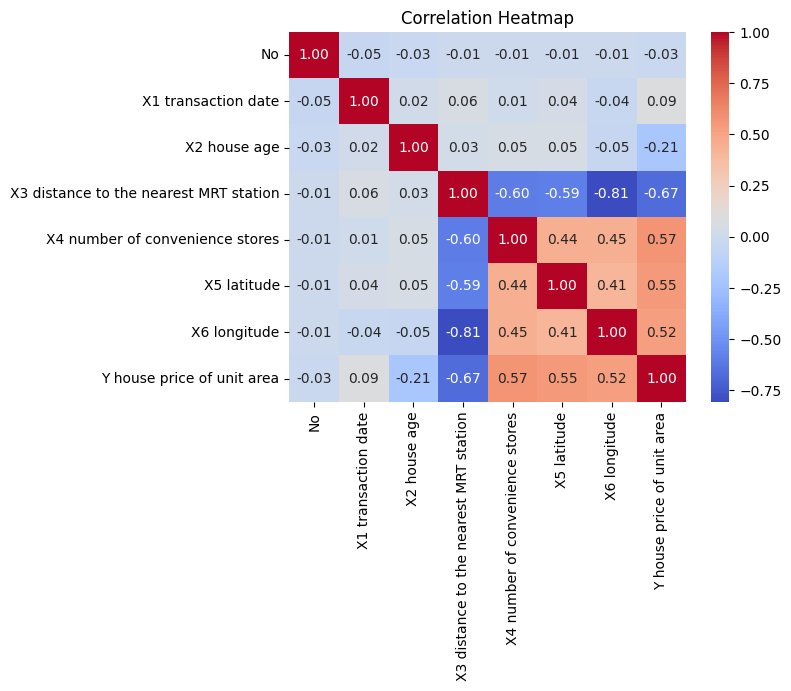

In [13]:
import seaborn as sns
sns.heatmap(data.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

In [14]:
print(f"X Shape: {X_train.shape}")
print(X_train)
print("\n")
print(f"y Shape: {y_train.shape}")
print(y_train)

X Shape: (414, 4)
[[1.2154024e-01 2.4982980e+01 1.0000000e+01 8.4878820e+01]
 [1.2153951e-01 2.4980340e+01 9.0000000e+00 3.0659470e+02]
 [1.2154391e-01 2.4987460e+01 5.0000000e+00 5.6198450e+02]
 ...
 [1.2153986e-01 2.4979230e+01 7.0000000e+00 3.9096960e+02]
 [1.2154067e-01 2.4966740e+01 5.0000000e+00 1.0481010e+02]
 [1.2154310e-01 2.4974330e+01 9.0000000e+00 9.0456060e+01]]


y Shape: (414,)
[3.790e-04 4.220e-04 4.730e-04 5.480e-04 4.310e-04 3.210e-04 4.030e-04
 4.670e-04 1.880e-04 2.210e-04 4.140e-04 5.810e-04 3.930e-04 2.380e-04
 3.430e-04 5.050e-04 7.010e-04 3.740e-04 4.230e-04 4.770e-04 2.930e-04
 5.160e-04 2.460e-04 4.790e-04 3.880e-04 2.700e-04 5.620e-04 3.360e-04
 4.700e-04 5.710e-04 2.210e-04 2.500e-04 3.420e-04 4.930e-04 5.510e-04
 2.730e-04 2.290e-04 2.530e-04 4.770e-04 4.620e-04 1.590e-04 1.820e-04
 3.470e-04 3.410e-04 5.390e-04 3.830e-04 4.200e-04 6.150e-04 1.340e-04
 1.320e-04 4.420e-04 2.070e-04 2.700e-04 3.890e-04 5.170e-04 1.370e-04
 4.190e-04 5.350e-04 2.260e-04 4.240

In [15]:
def predict(x, w, b): 
    p = np.dot(x, w) + b     
    return p
    

In [16]:
# L regularization
# def compute_cost(X, y, w, b): 
#     m = X.shape[0]
#     cost = 0.0
#     for i in range(m):                                
#         f_wb_i = np.dot(X[i], w) + b           
#         cost = cost + (f_wb_i - y[i])**2       
#     cost = cost / (2 * m)                       
#     return cost

# L1 regularization
# def compute_cost(X, y, w, b): 
#     m = X.shape[0]
#     n=len(w)
#     cost = 0.0
#     reg_p = 0.1
#     norm = 0.0
#     for j in range(n):
#         norm = norm + abs(w[j])
#     for i in range(m):                                
#         f_wb_i = np.dot(X[i], w) + b           
#         cost = cost + (f_wb_i - y[i])**2       
#     cost = (cost + (reg_p * norm)) / (2 * m)                       
#     return cost


# L2 regularization
def compute_cost(X, y, w, b): 
    m = X.shape[0]
    n=len(w)
    cost = 0.0
    reg_p = 0.1
    norm = 0.0
    for j in range(n):
        norm = norm + ((w[j])**2)
    for i in range(m):                                
        f_wb_i = np.dot(X[i], w) + b           
        cost = cost + (f_wb_i - y[i])**2       
    cost = (cost + (reg_p * norm)) / (2 * m)                       
    return cost

In [17]:
# L regularization
# def compute_gradient(X, y, w, b): 
#     m,n = X.shape           
#     dj_dw = np.zeros((n,))
#     dj_db = 0.
#     for i in range(m):                             
#         err = (np.dot(X[i], w) + b) - y[i]   
#         for j in range(n):                         
#             dj_dw[j] = dj_dw[j] + err * X[i, j]    
#         dj_db = dj_db + err                        
#     dj_dw = dj_dw / m                                
#     dj_db = dj_db / m                                
#     return dj_db, dj_dw

# L1 regularization
# def compute_gradient(X, y, w, b): 
#     m,n = X.shape           
#     dj_dw = np.zeros((n,))
#     dj_db = 0.

#     if sum(w)>0:
#         reg_p = 0.1
#     else:
#         reg_p = -0.1

#     for i in range(m):                             
#         err = (np.dot(X[i], w) + b) - y[i]   
#         for j in range(n):                         
#             dj_dw[j] = dj_dw[j] + err * X[i, j]    
#         dj_db = dj_db + err                        
#     dj_dw = (dj_dw + reg_p) / m                                
#     dj_db = dj_db / m                                
#     return dj_db, dj_dw


# L2 regularization
def compute_gradient(X, y, w, b): 
    m,n = X.shape           
    dj_dw = np.zeros((n,))
    dj_db = 0.
    
    reg_p = 0.1
    

    for i in range(m):                             
        err = (np.dot(X[i], w) + b) - y[i]   
        for j in range(n):                         
            dj_dw[j] = dj_dw[j] + err * X[i, j]    
        dj_db = dj_db + err                        
    dj_dw = (dj_dw + (reg_p * sum(w)) ) / m                                
    dj_db = dj_db / m                                
    return dj_db, dj_dw

In [18]:
def gradient_descent(X, y, w_in, b_in, cost_function, gradient_function, alpha, num_iters): 
    J_history = []
    w = copy.deepcopy(w_in)  
    b = b_in
    
    for i in range(num_iters):

        dj_db,dj_dw = gradient_function(X, y, w, b)   
        w = w - alpha * dj_dw               
        b = b - alpha * dj_db               
        if i<100000:
            J_history.append( cost_function(X, y, w, b))
        if i% math.ceil(num_iters / 10) == 0:
            print(f"Iteration {i:4d}: Cost {J_history[-1]:8.2f}   ")
        
    return w, b, J_history #return final w,b and J history for graphing

In [21]:
b_init = 0
w_init = np.array([ 0.0, 0.0, 0.0, 0.0])
print("w_init shape: ",w_init.shape )

w_init shape:  (4,)


In [25]:
# initialize parameters
initial_w = np.zeros_like(w_init)
initial_b = 0.
iterations = 30000
alpha = 1.0e-3
w_final, b_final, J_hist = gradient_descent(X_train, y_train, initial_w, initial_b,compute_cost, compute_gradient, alpha, iterations)
print(f"b,w found by gradient descent: {b_final:0.2f},{w_final} ")

Iteration    0: Cost     0.12   


C:\Users\Hp\AppData\Local\Temp\ipykernel_9984\3638095803.py:38: RuntimeWarning: overflow encountered in scalar add
  cost = cost + (f_wb_i - y[i])**2
C:\Users\Hp\AppData\Local\Temp\ipykernel_9984\3638095803.py:38: RuntimeWarning: overflow encountered in scalar power
  cost = cost + (f_wb_i - y[i])**2
C:\Users\Hp\AppData\Local\Temp\ipykernel_9984\3638095803.py:35: RuntimeWarning: overflow encountered in scalar power
  norm = norm + ((w[j])**2)
C:\Users\Hp\AppData\Local\Temp\ipykernel_9984\1606559590.py:48: RuntimeWarning: overflow encountered in scalar add
  dj_dw[j] = dj_dw[j] + err * X[i, j]
C:\Users\Hp\AppData\Local\Temp\ipykernel_9984\1606559590.py:48: RuntimeWarning: invalid value encountered in scalar multiply
  dj_dw[j] = dj_dw[j] + err * X[i, j]
C:\Users\Hp\AppData\Local\Temp\ipykernel_9984\1230181723.py:9: RuntimeWarning: invalid value encountered in subtract
  w = w - alpha * dj_dw


Iteration 3000: Cost      nan   
Iteration 6000: Cost      nan   
Iteration 9000: Cost      nan   
Iteration 12000: Cost      nan   
Iteration 15000: Cost      nan   
Iteration 18000: Cost      nan   
Iteration 21000: Cost      nan   
Iteration 24000: Cost      nan   
Iteration 27000: Cost      nan   
b,w found by gradient descent: nan,[nan nan nan nan] 


NameError: name 'J_hist' is not defined

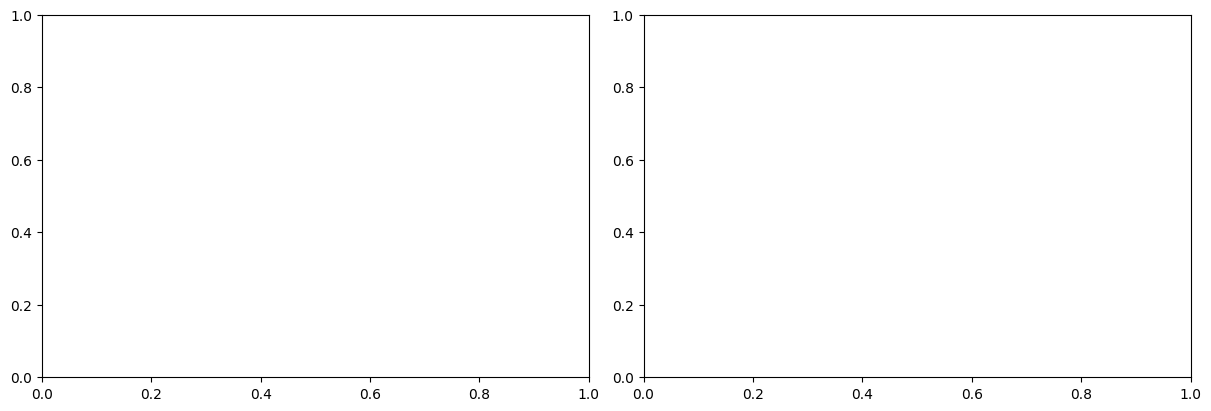

In [22]:
# plot cost versus iteration  
fig, (ax1, ax2) = plt.subplots(1, 2, constrained_layout=True, figsize=(12, 4))
ax1.plot(J_hist)
ax2.plot(100 + np.arange(len(J_hist[100:])), J_hist[100:])
ax1.set_title("Cost vs. iteration");  ax2.set_title("Cost vs. iteration (tail)")
ax1.set_ylabel('Cost')             ;  ax2.set_ylabel('Cost') 
ax1.set_xlabel('iteration step')   ;  ax2.set_xlabel('iteration step') 
plt.show()

In [24]:
area=float(input("enter the a :"))
bed=float(input("enter the value of b :"))
bath=float(input("enter the value of c:"))
story=float(input("enter the value of d :"))
price = b_final + ((w_final[0]*1000*a) + (w_final[1]*b) + (w_final[2]*c) + (w_final[3]*d))
print(price)



enter the a : 192
enter the value of b : 234
enter the value of c: 56
enter the value of d : 45


NameError: name 'b_final' is not defined